In [681]:
import numpy as np
import pandas as pd
from collections import Counter
from numpy import random
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
import seaborn as sns
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
import matplotlib
import warnings
warnings.filterwarnings('ignore')



In [683]:
app_df=pd.read_csv('application_data.csv')

In [597]:
prev_df.shape

(1670214, 26)

# Checking shape and size of application_data.csv

In [599]:
app_df.shape

(307511, 122)

In [600]:
pd.set_option('display.max_columns', 122)


# Working with null values
# finding percentage null values in each columns and arranging them in ascending order


In [602]:

app_df.isnull().sum()/len(app_df)*100
(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending= False)


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

# removing columns where null values are more than 50%

In [604]:
clean_app = app_df.loc[ : ,(app_df.isnull().sum()/len(app_df)*100 <50)]
clean_app.shape

(307511, 81)

In [605]:
clean_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [606]:
clean_app.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

# Checking data with more than 30% null values

In [685]:
app_df.loc[ : ,(app_df.isnull().sum()/len(app_df)*100 >30)].head()

,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,NaN,Laborers,0.083037,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No
1,NaN,Core staff,0.311267,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No
2,26.0,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# According to me these two factors may play imp role for approving or rejecting loan request of the applicants

1. TOTALAREA_MODE- This column will help us to know what kind of property of the customer holds [assest]
2.  OCCUPATION_TYPE- By analyzing the occupation we can analyze the applicant's source of income 
 


In [687]:
# now wwe will filer out the new cleand df where the nullvalues <30  
# now we will overwrite the new filtered df with  nullvalues < 30
app_df = app_df.loc[ : ,(app_df.isnull().sum()/len(app_df)*100 <30)]              
app_df.shape


(307511, 72)

In [689]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [612]:
app_df.shape

(307511, 72)

In [613]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [695]:
columns_to_drop = [
    'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]
app_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [697]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_

# Let us check Education type and Income relationship

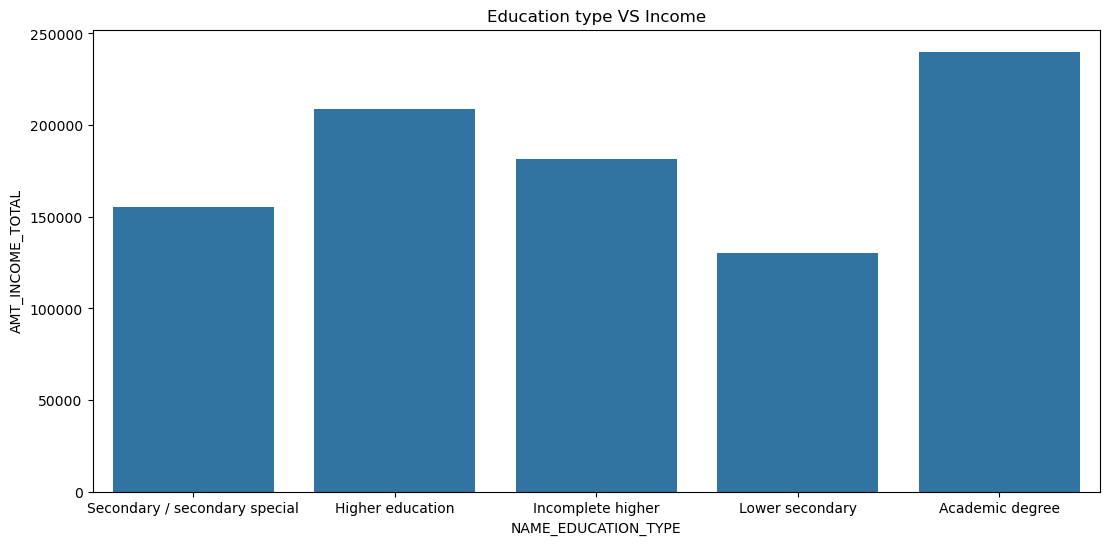

In [617]:
plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data= app_df,errorbar=None)
plt.title('Education type VS Income')
plt.show()

# Education VS Income VS Gender

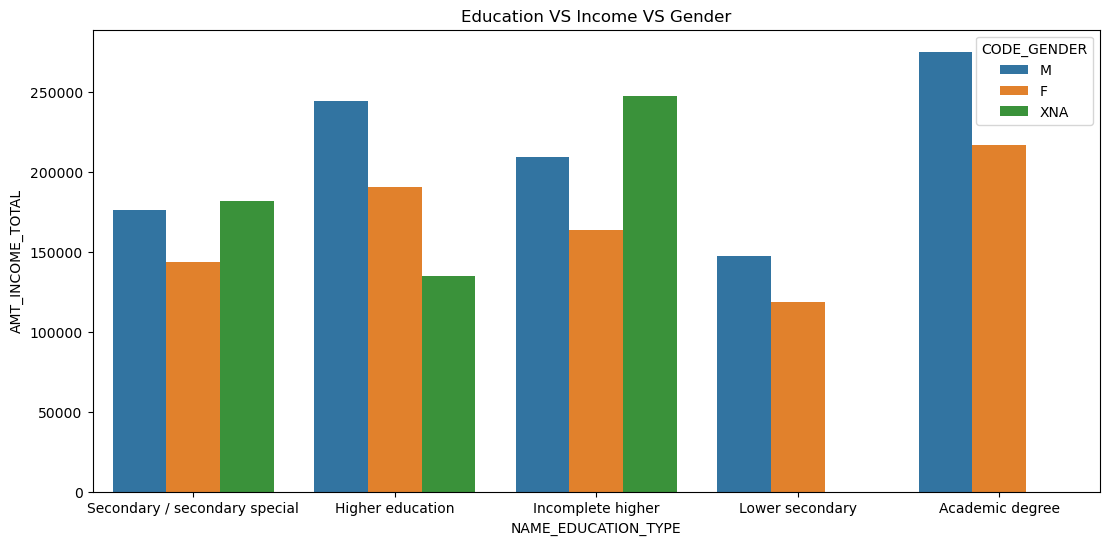

In [619]:
plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data= app_df, hue= 'CODE_GENDER', errorbar=None)
plt.title('Education VS Income VS Gender')
plt.show()

In [620]:
# abbove graph shows we have xna gender whihc is invalid so we will replace it with nan
app_df = app_df.replace('XNA',np.NaN)

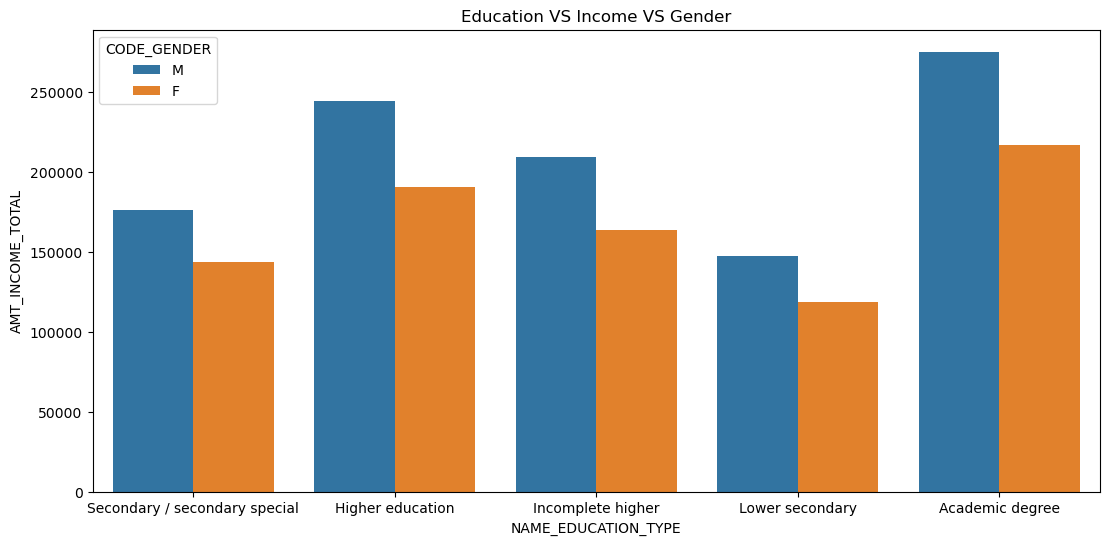

In [621]:
plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data= app_df, hue= 'CODE_GENDER', errorbar=None)
plt.title('Education VS Income VS Gender')
plt.show()

# Target column is our goal , so lets check its relationship

Text(0.5, 1.0, 'Income VS Repayment Probability')

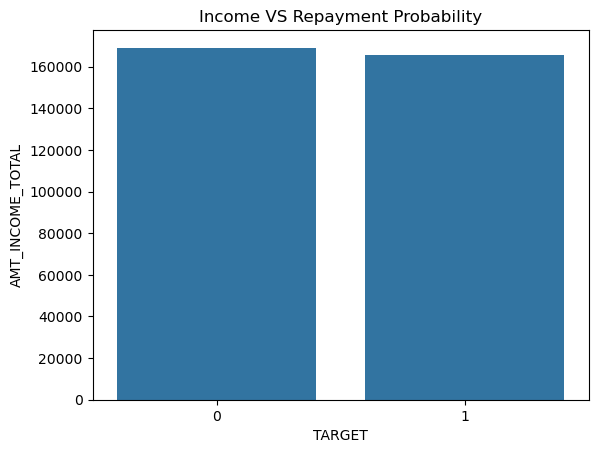

In [623]:
# relationship between AMT_INCOME_TOTAL and ease of repayment
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data= app_df,errorbar=None)
plt.title('Income VS Repayment Probability')


In [624]:
'''# above graph shows there no relationship btweeen them'''

'# above graph shows there no relationship btweeen them'

# Letss check which tyoe of  applicants who dont repay the loan 

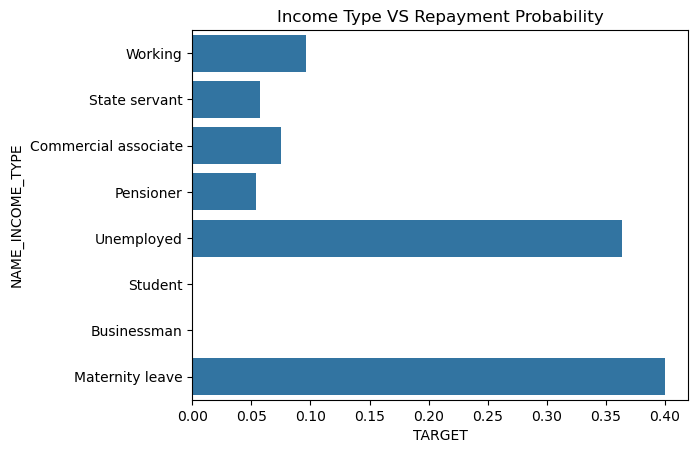

In [626]:
sns.barplot(x= 'TARGET', y= 'NAME_INCOME_TYPE', data= app_df,errorbar=None)
plt.title('Income Type VS Repayment Probability')
plt.show()


In [627]:
app_df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

# Checking NAME_EDUCATION_TYPE and AMT_CREDIT verses NAME_FAMILY_STATUS


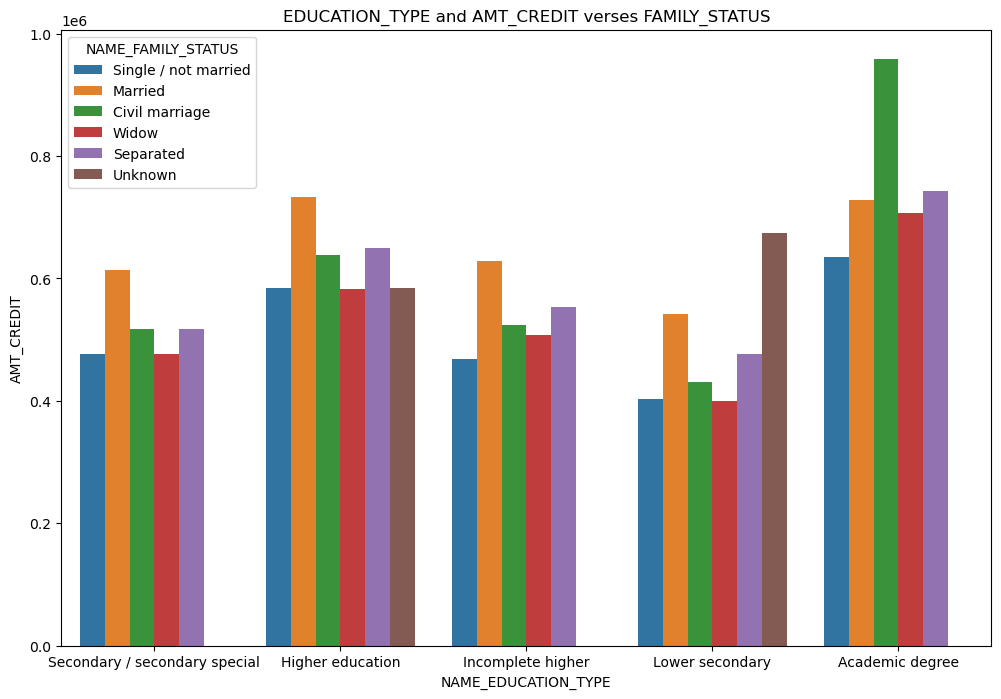

In [629]:

plt.figure(figsize=(12,8))
#plt.xticks(rotation=45)
sns.barplot(data= app_df, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',errorbar=None)
plt.title('EDUCATION_TYPE and AMT_CREDIT verses FAMILY_STATUS')
plt.show()


In [630]:
'''Applicants with a family status of "Civil marriage" and an academic degree tend to receive the highest loan amounts. 
In contrast, individuals who are single or not married have the lowest loan amounts, 
regardless of their education level.'''

'Applicants with a family status of "Civil marriage" and an academic degree tend to receive the highest loan amounts. \nIn contrast, individuals who are single or not married have the lowest loan amounts, \nregardless of their education level.'

# NAME_EDUCATION_TYPE, AMT_CREDIT, CODE_GENDER


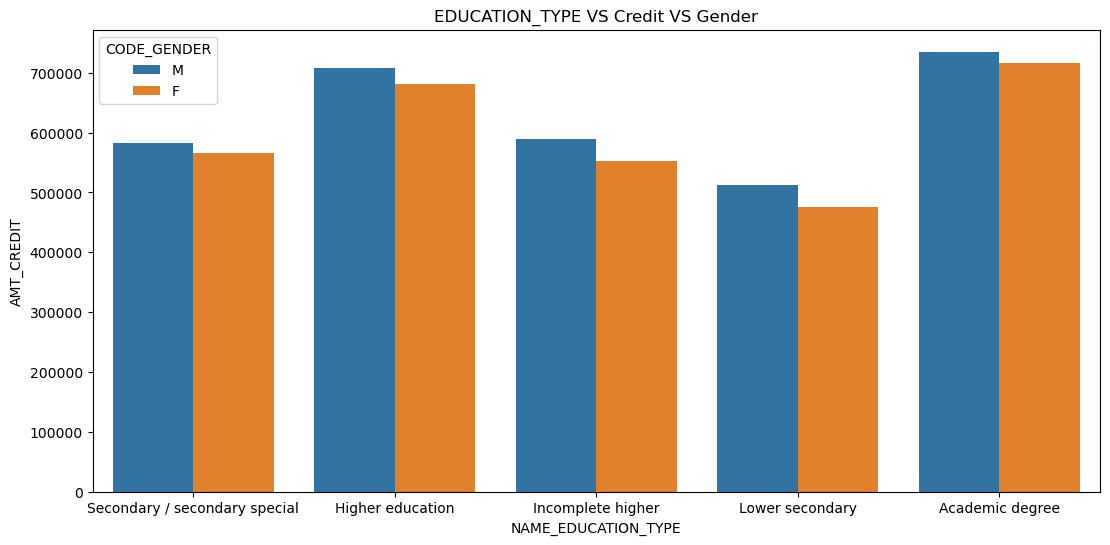

In [632]:

plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data= app_df, hue= 'CODE_GENDER',errorbar=None)
plt.title("EDUCATION_TYPE VS Credit VS Gender")
plt.show()


In [633]:
'''As the level of education increases, the loan amount credited also tends to increase for both males and females, 
indicating a positive correlation between education level and loan credit amount'''

'As the level of education increases, the loan amount credited also tends to increase for both males and females, \nindicating a positive correlation between education level and loan credit amount'

# Gender VS Loan Credit VS Target


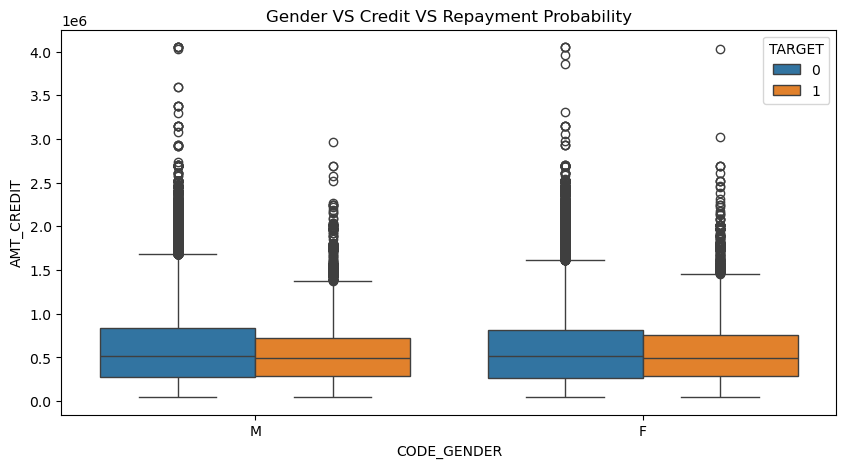

In [635]:

plt.figure(figsize=(10,5))
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data= app_df, hue= 'TARGET')
plt.title('Gender VS Credit VS Repayment Probability')
plt.show()

In [636]:
''' By analyzing the box plot, it is evident that the probability of males and females 
falling into the default category shows negligible difference, indicating that gender 
does not significantly impact the likelihood of loan default '''

' By analyzing the box plot, it is evident that the probability of males and females \nfalling into the default category shows negligible difference, indicating that gender \ndoes not significantly impact the likelihood of loan default '

#  Grouping Age into bins of '20-30','30-40','40-50','50-60','>60'


In [699]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_

In [ ]:
app_df['Age_Group'].head()

In [ ]:
sns.boxplot(data= app_df, x='Age_Group', y='AMT_CREDIT', hue ='TARGET')
plt.title('Age_Group verses AMT_CREDIT verses TARGET')

In [ ]:
''' 
Older age groups (40+) tend to take higher credit amounts and repay more reliably. 
Younger age groups exhibit higher variability in credit amounts and a greater proportion of defaults.
'''

# Scatter plot with differentiation by TARGET (Defaulters vs Repayers)


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_df,
    x='AMT_CREDIT',
    y='AMT_ANNUITY',
    hue='TARGET',  
    palette={0: 'green', 1: 'red'}, )

# Adding labels and title
plt.title('Scatter Plot: Credit Amount vs Annuity Amount (Defaulters vs Repayers)', fontsize=14)
plt.xlabel('Credit Amount (AMT_CREDIT)', fontsize=12)
plt.ylabel('Annuity Amount (AMT_ANNUITY)', fontsize=12)
plt.legend(title='Target', labels=['Defaulters (1)', 'Repayers (0)'], fontsize=10)
plt.grid(True)

In [ ]:
''' 
Higher credit and annuity amounts tend to increase the likelihood of default, 
whereas lower values are associated with better repayment behavior.

'''

In [671]:
app_df.shape


(307511, 26)

In [701]:
columns_to_drop = [
    'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
    'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
    'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY'
]
app_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [703]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [707]:
app_df.shape

(307511, 26)

# Distribution of TARGET Column (Defaulters vs Repayers)

Text(0.5, 0, 'Loan Status')

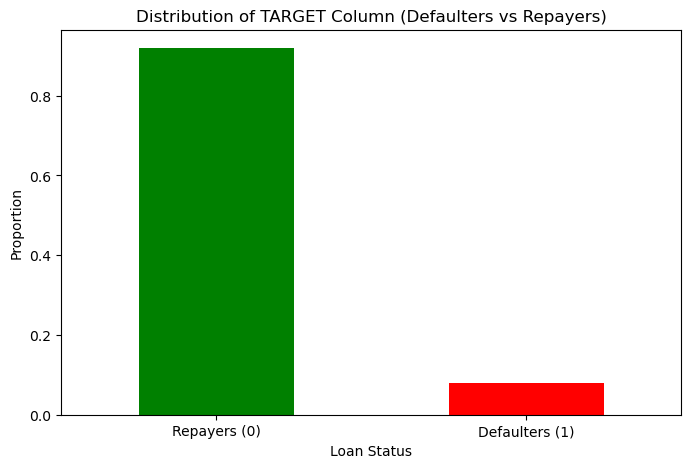

In [709]:
app_df['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'], figsize=(8, 5))
plt.title('Distribution of TARGET Column (Defaulters vs Repayers)')
plt.xticks(ticks=[0, 1], labels=[ 'Repayers (0)','Defaulters (1)'], rotation=0)
plt.ylabel('Proportion')
plt.xlabel('Loan Status')

# Credit Amount Distribution by Loan Status

Text(0.5, 0, 'Loan Status')

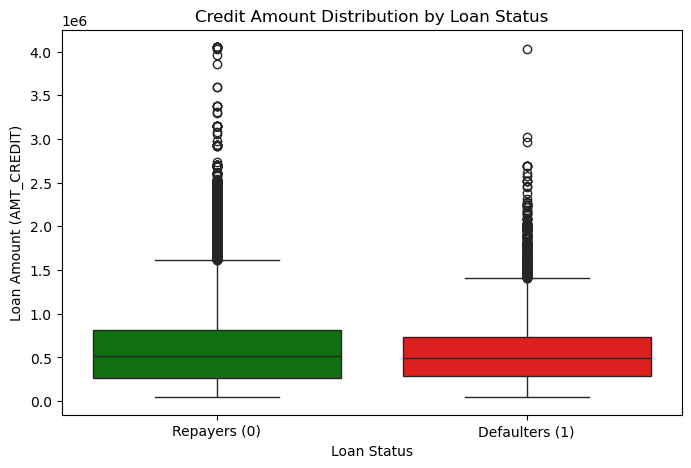

In [711]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=app_df, x='TARGET', y='AMT_CREDIT', palette=['green', 'red'])
plt.title('Credit Amount Distribution by Loan Status')
plt.xticks(ticks=[0, 1], labels=['Repayers (0)','Defaulters (1)'], rotation=0)
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.xlabel('Loan Status')

In [ ]:
'''Defaulters tend to have smaller loan amounts compared to repayers, suggesting that loan size might influence repayment behavior.'''

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Businessman'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'Maternity leave'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'State servant'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Unemployed'),
  Text(7, 0, 'Working')])

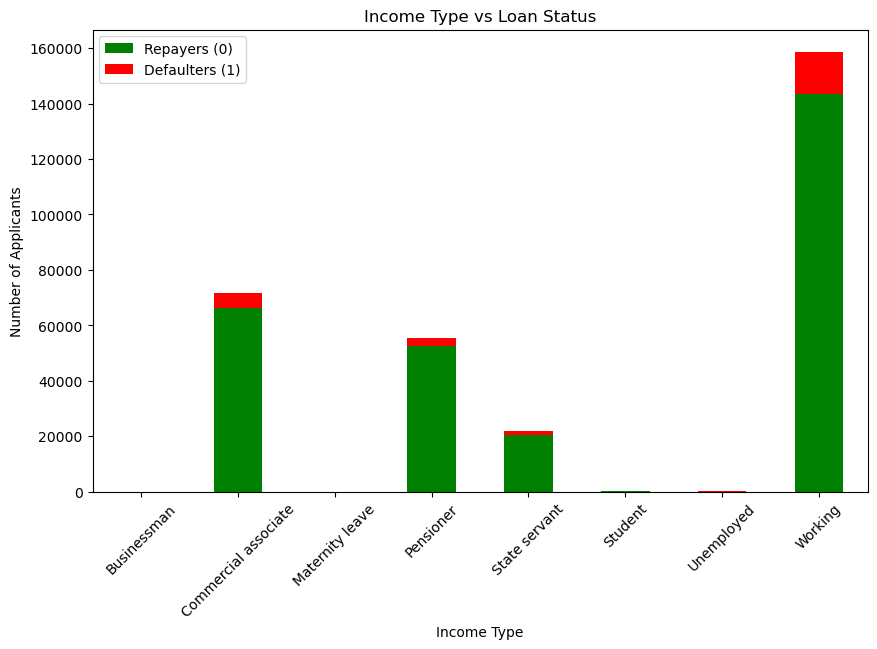

In [713]:
income_target = app_df.groupby(['NAME_INCOME_TYPE', 'TARGET'])['SK_ID_CURR'].count().unstack()
income_target.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Income Type vs Loan Status')
plt.ylabel('Number of Applicants')
plt.xlabel('Income Type')
plt.legend(['Repayers (0)', 'Defaulters (1)'])
plt.xticks(rotation=45)

In [ ]:
 ''' Applicants classified as "Commercial associate," "Pensioner," "State servant," and "Working" 
 are more likely to repay their loans, showing lower default rates compared to other income groups. 
 This insight could guide loan approval strategies by prioritizing these income categories.
 '''

In [715]:
age_group_target = app_df.groupby(['Age_Group', 'TARGET'])['SK_ID_CURR'].count().unstack()
age_group_target.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Age Group vs Loan Status')
plt.ylabel('Number of Applicants')
plt.xlabel('Age Group')
plt.legend(['Repayers (0)', 'Defaulters (1)'])
plt.xticks(rotation=45)

KeyError: 'Age_Group'

In [ ]:
plt.figure(figsize=(10, 8))
corr = app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with TARGET')
plt.show()

In [ ]:
''' 
The heatmap highlights strong relationships among the financial variables themselves but shows that these variables have limited direct correlation with loan default (TARGET). 
Other factors beyond these financial metrics likely play a significant role in influencing default probabilities.
'''

In [717]:
prev_df=pd.read_csv('previous_application.csv')

In [719]:
app_df.shape

(307511, 26)

In [721]:
prev_df.shape

(1670214, 37)

In [723]:
prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [725]:

prev_df.isnull().sum()/len(prev_df)*100
(prev_df.isnull().sum()/len(prev_df)*100).sort_values(ascending= False)


RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [727]:
columns_to_drop = [
    'RATE_INTEREST_PRIVILEGED',
    'RATE_INTEREST_PRIMARY',
    'AMT_DOWN_PAYMENT',
    'RATE_DOWN_PAYMENT',
    'NAME_TYPE_SUITE',
    'NFLAG_INSURED_ON_APPROVAL',
    'DAYS_TERMINATION',
    'DAYS_LAST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_FIRST_DUE',
    'DAYS_FIRST_DRAWING'
]

prev_df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(prev_df.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [ ]:
prev_df.isnull().sum()

In [729]:
prev_df.drop(columns=['AMT_GOODS_PRICE'], axis=1, inplace=True)


In [731]:
prev_df.CNT_PAYMENT.value_counts()

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

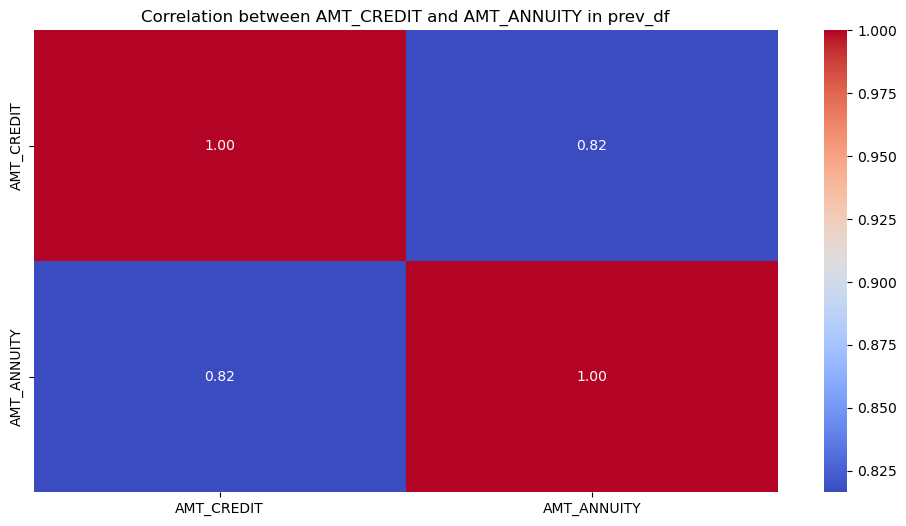

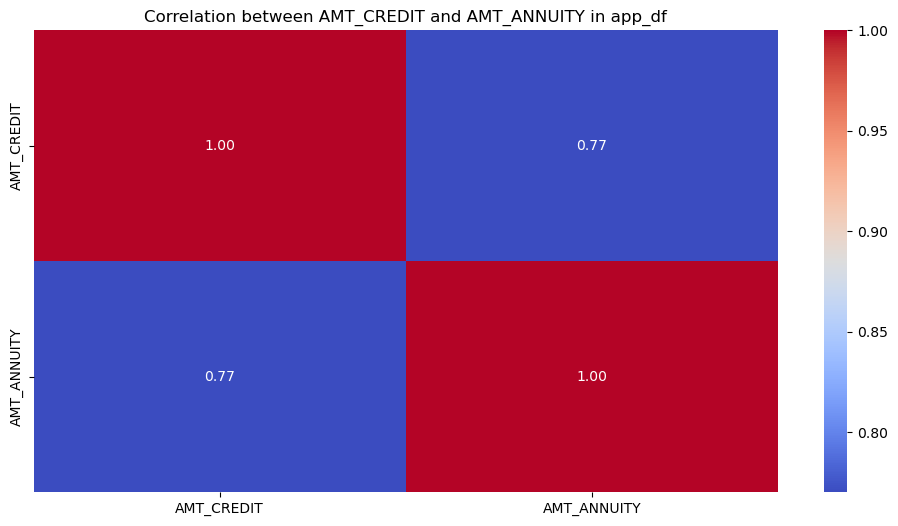

In [733]:
# Plot for prev_df
plt.figure(figsize=(12, 6))
sns.heatmap(prev_df[['AMT_CREDIT', 'AMT_ANNUITY']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between AMT_CREDIT and AMT_ANNUITY in prev_df")
plt.show()

# Plot for app_df
plt.figure(figsize=(12, 6))
sns.heatmap(app_df[['AMT_CREDIT', 'AMT_ANNUITY']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between AMT_CREDIT and AMT_ANNUITY in app_df")
plt.show()

In [ ]:
'''The heatmaps reveal a strong positive correlation between AMT_CREDIT and AMT_ANNUITY in both prev_df and app_df, 
indicating that higher credit amounts are generally associated with higher annuity amounts across both datasets.'''

In [735]:
merged_df = pd.merge(app_df, prev_df, on='SK_ID_CURR', how='inner') 

In [737]:
merged_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_x                0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_x                        0
AMT_ANNUITY_x                      93
AMT_GOODS_PRICE                  1208
NAME_TYPE_SUITE                  3526
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
ORGANIZATION_TYPE                   0
EXT_SOURCE_2                     1821
EXT_SOURCE_3                   241842
OBS_30_CNT_SOCIAL_CIRCLE         3146
DEF_30_CNT_SOCIAL_CIRCLE         3146
OBS_60_CNT_SOCIAL_CIRCLE         3146
DEF_60_CNT_SOCIAL_CIRCLE         3146
DAYS_LAST_PHONE_CHANGE              0
FLAG_DOCUMENT_2                     0
FLAG_DOCUMENT_3                     0
SK_ID_PREV  

Text(0.5, 1.0, 'CNT_PAYMENT (Previous Loan) vs Default (TARGET) in Merged Dataset')

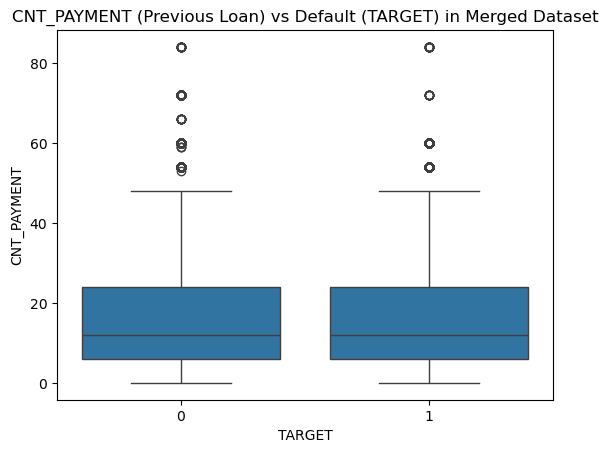

In [739]:
sns.boxplot(x='TARGET', y='CNT_PAYMENT', data=merged_df)
plt.title('CNT_PAYMENT (Previous Loan) vs Default (TARGET) in Merged Dataset')

In [ ]:
''' Non-defaulters tend to have loans with a higher number of installments (CNT_PAYMENT), indicating smaller, more manageable payments, 
while defaulters generally have fewer installments, potentially leading to higher payment burdens.'''

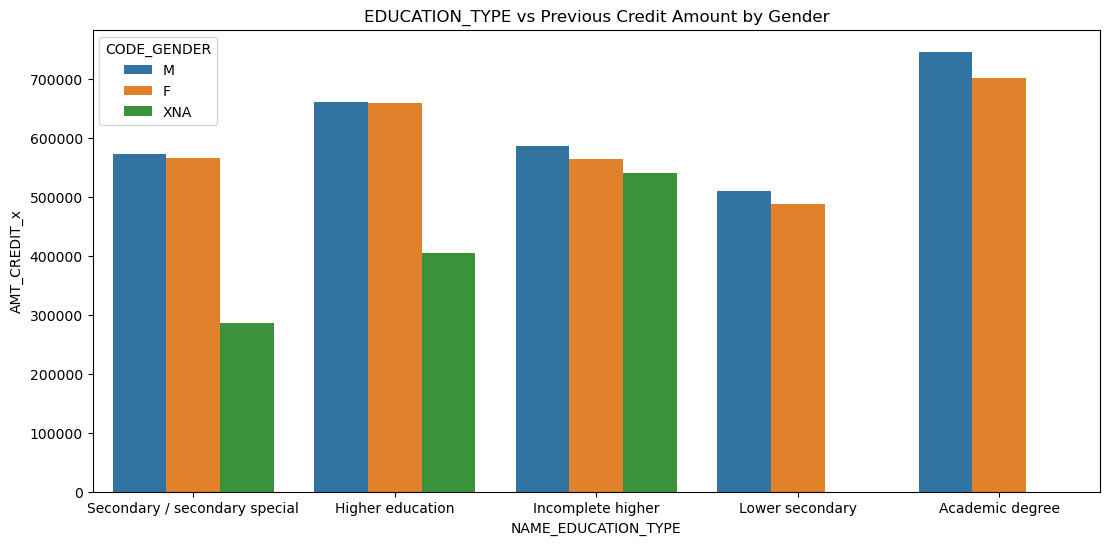

In [741]:
plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_x', data=merged_df, hue='CODE_GENDER', errorbar=None)
plt.title('EDUCATION_TYPE vs Previous Credit Amount by Gender')
plt.show()


In [ ]:
''' Again here the Gender and the education type has no relation with credit amounts 
even after merging older and new applicants records '''

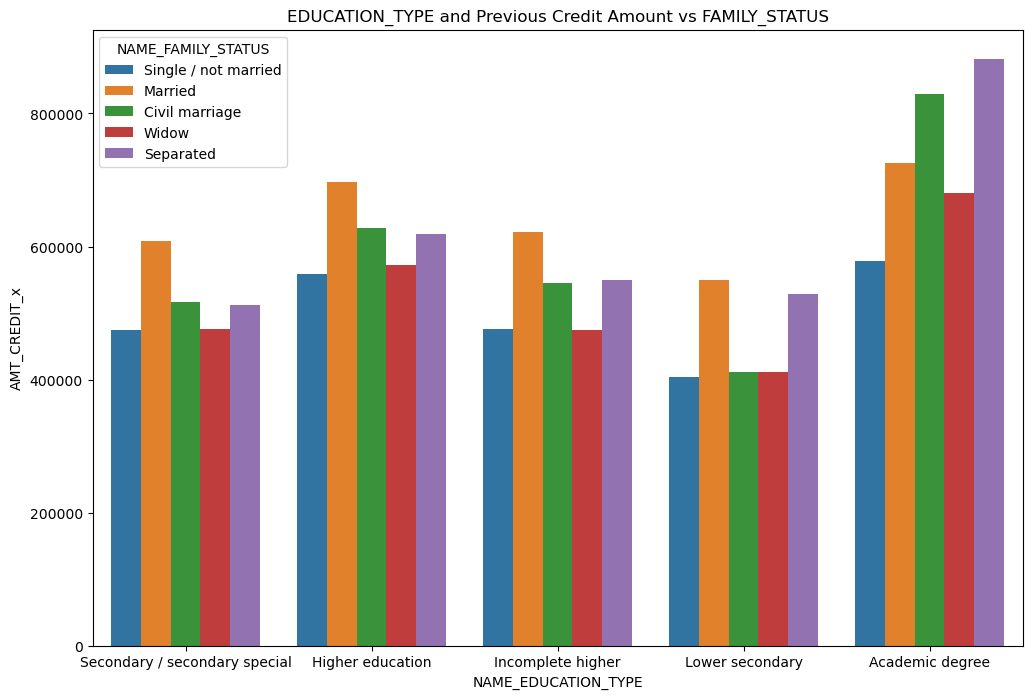

In [743]:
plt.figure(figsize=(12,8))
sns.barplot(data=merged_df, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_x', hue='NAME_FAMILY_STATUS', errorbar=None)
plt.title('EDUCATION_TYPE and Previous Credit Amount vs FAMILY_STATUS')
plt.show()


In [ ]:
''' People with the family status Separated and Civil marriage with academic degree ,
have high probability of getting loan amount'''

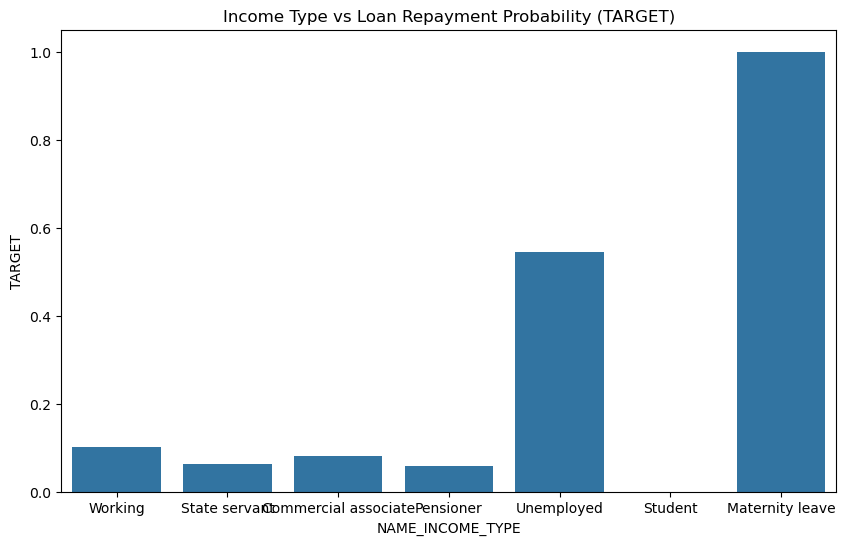

In [745]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=merged_df, errorbar=None)
plt.title('Income Type vs Loan Repayment Probability (TARGET)')
plt.show()


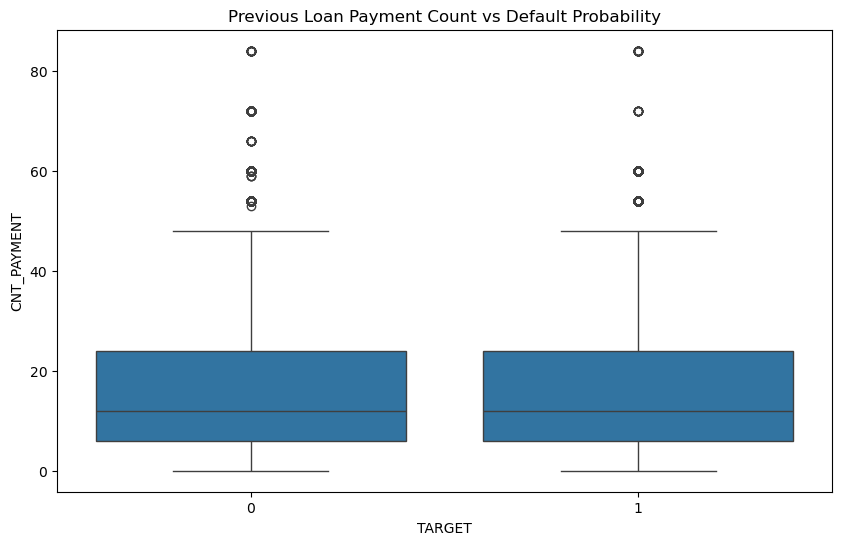

In [747]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='CNT_PAYMENT', data=merged_df)
plt.title('Previous Loan Payment Count vs Default Probability')
plt.show()


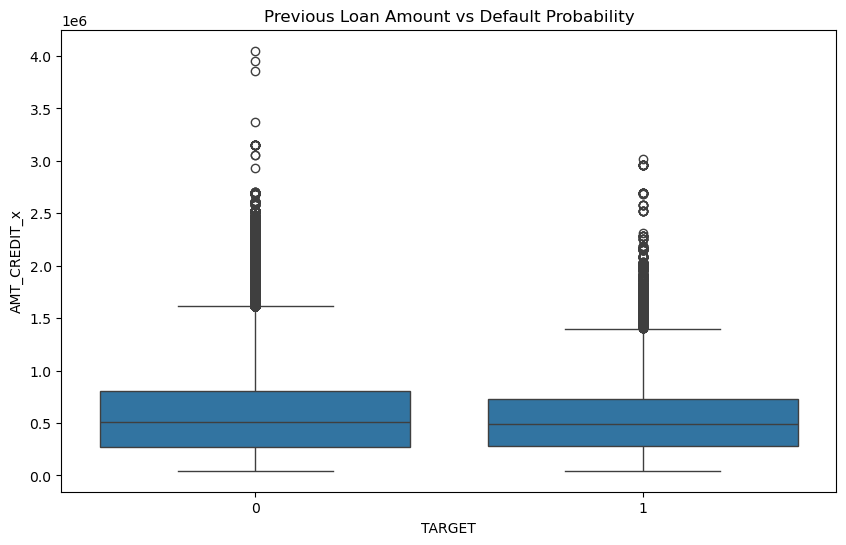

In [749]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT_x', data=merged_df)
plt.title('Previous Loan Amount vs Default Probability')
plt.show()


In [ ]:
''' The difference between the probability of people paying the loan or not is insignificant '''

# Creating age bins in prev_df to see what variations we can find out

In [ ]:
age_group_analysis_merged = merged_df.groupby(['Age_Group', 'TARGET']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Count', hue='TARGET', data=age_group_analysis_merged, palette={0: 'green', 1: 'red'})
plt.title('Age Group vs Loan Default Probability (TARGET) in Merged Data')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Repayers (0)', 'Defaulters (1)'])

# Comparison of app_df and merged_df 

In [ ]:
age_group_analysis_app = app_df.groupby(['Age_Group', 'TARGET']).size().reset_index(name='Count')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# app_df plot
sns.barplot(x='Age_Group', y='Count', hue='TARGET', data=age_group_analysis_app, palette={0: 'green', 1: 'red'}, ax=axes[0])
axes[0].set_title('Age Group vs Loan Default Probability (TARGET) in app_df')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# merged_df plot
sns.barplot(x='Age_Group', y='Count', hue='TARGET', data=age_group_analysis_merged, palette={0: 'green', 1: 'red'}, ax=axes[1])
axes[1].set_title('Age Group vs Loan Default Probability (TARGET) in merged_df')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()

Based on the graph from app_df, we can observe that individuals in the 20-30 age group have a higher rate of loan repayment compared to the previous records. 

This suggests that, in the more recent data, younger individuals (20-30 years old) are better able to manage loan repayment, possibly indicating improvements in their financial behavior, economic conditions, or lending policies.

# In this analysis, we explored factors affecting loan approval and default rates, focusing on gender, age, income, and employment status. We found that higher education levels and stable professions led to better loan repayment rates, while unemployed individuals and women on maternity leave showed higher default rates. 

''' Age groups between 20-30 were more likely to repay loans successfully, while those in their 30s and 40s were prone to default. 
Based on these insights, we suggest the bank introduce tailored schemes for unemployed individuals and women on maternity leave, offering flexible terms and lower interest rates.

Additionally, understanding income levels, profession, and job stability can help the bank refine its loan approval process, reducing defaults and improving customer retention.''' 

 #  Suggestion:

Based on the analysis, I recommend that the bank consider developing specialized loan schemes targeting unemployed individuals and women on maternity leave,
as these groups have a higher likelihood of defaulting on loans. 

By offering flexible repayment plans, lower interest rates, or deferred payment options, the bank could better support these segments while potentially reducing default rates.

Furthermore, the bank should also factor in education, income levels, and job stability in its loan approval process, prioritizing applicants in stable professions with higher education and income, 
as these individuals tend to have a better track record of repaying loans. 

This data-driven approach would not only improve loan repayment rates but also enhance customer satisfaction and retention.